In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
import spin_models as spin
import Merger_rate_plot as merg


In [3]:
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value

In [5]:
df_binary_GW = pd.read_csv("Data/binary-GW-kick-data.csv",index_col=False)
df_binary_GW.head()

,M1,M2,t_merger,Merger,Type,GW-kick-random,GW-kick-aligned
0,2.261179e+09,1.629006e+09,8.587741e+08,Yes,iso,611.319952,85.240339
1,1.614773e+09,1.077349e+09,8.934006e+08,Yes,iso,175.761905,68.109087
2,6.554858e+09,1.175723e+09,4.120229e+09,Yes,iso,259.534551,112.117402
3,2.595241e+09,1.829403e+09,1.008371e+09,Yes,iso,1585.065698,334.797135
4,1.497145e+10,2.327060e+09,1.495238e+09,Yes,iso,177.221309,69.815147


In [17]:
df_triple_GW = pd.read_csv("Data/triples-GW-kick-data.csv",index_col=False)
df_triple_GW.head()

,Unnamed: 0,Mass 1,Mass 2,Mass 3,t_merger,Flag,GW-kick-random,GW-kick-aligned
0,1,1.546540e+08,4.211761e+07,3.132749e+08,5.529691e+09,Tr,1084.466839,246.289465
1,5,9.436961e+06,1.002870e+06,4.551391e+08,1.125820e+10,Tr,18.149984,3.124250
2,6,1.002870e+06,4.551391e+08,9.436961e+06,4.452059e+09,Tr,19.646956,3.692619
3,8,3.159667e+07,6.693184e+06,1.266341e+07,2.713837e+09,Tr,784.496822,306.359863
4,9,3.159667e+07,6.693184e+06,1.266341e+07,4.003125e+09,Tr,1142.298736,271.976319


In [131]:
threshold = 500

In [132]:
t_triple_GW

array([], dtype=float64)

In [133]:
t_triple_GW = df_triple_GW[df_triple_GW['GW-kick-aligned']>threshold]["t_merger"].to_numpy()
z_triple_GW = z_at_value(cosmo.age, (t_triple_GW/10**9)*u.Gyr,zmin=1e-9)

In [134]:
t_triple_GW_r = df_triple_GW[df_triple_GW['GW-kick-random']>threshold]["t_merger"].to_numpy()
z_triple_GW_r = z_at_value(cosmo.age, (t_triple_GW_r/10**9)*u.Gyr,zmin=1e-9)

In [135]:
t_binary_GW = df_binary_GW[df_binary_GW['GW-kick-aligned']>500]["t_merger"].to_numpy()
z_binary_GW = z_at_value(cosmo.age, (t_binary_GW/10**9)*u.Gyr,zmin=1e-9)

In [136]:
t_binary_GW_r = df_binary_GW[df_binary_GW['GW-kick-random']>500]["t_merger"].to_numpy()
z_binary_GW_r = z_at_value(cosmo.age, (t_binary_GW_r/10**9)*u.Gyr,zmin=1e-9)

In [137]:
z_GW = np.concatenate((z_binary_GW,z_triple_GW))

In [138]:
z_GW_r = np.concatenate((z_binary_GW_r,z_triple_GW_r))

In [139]:
df_triple_slingshot = pd.read_csv("Data/triples-slingshot-data.csv",index_col=False)
df_triple_slingshot.head()

,Unnamed: 0,Mass 1,Mass 2,Mass 3,t_merger,Slingshot_kick,Flag
0,0,2.150737e+07,8.204738e+06,5.276829e+07,1.985633e+09,1802.260202,No
1,2,1.546540e+08,4.211761e+07,3.132749e+08,3.025313e+09,301.352009,No
2,3,1.546540e+08,4.211761e+07,3.132749e+08,1.972738e+09,192.293287,No
3,4,9.436961e+06,1.002870e+06,4.551391e+08,4.814316e+09,10529.351190,No
4,7,9.436961e+06,1.002870e+06,4.551391e+08,9.469051e+09,3388.800447,No


In [140]:
t_slinsghot = df_triple_slingshot[df_triple_slingshot['Slingshot_kick']>500]["t_merger"].to_numpy()
z_slingshot = z_at_value(cosmo.age,(t_slinsghot/10**9)*u.Gyr,zmin=1e-9)

In [141]:
zmax = 7
zbinsize = 0.2
lgzbinsize=0.3
lgzmin=-3.0
lgzmax = 1.0

In [142]:
merger_rate_GW,lgzbins_GW,dNdlogzdt_GW = merg.merger_rate_log_plot(z_GW,zmax=7,zbinsize=0.2,lgzbinsize=0.5,lgzmin=-3,lgzmax=1)

total merger rate (yr^-1):  0.0009563908411336382


In [143]:
merger_rate_GW_r,lgzbins_GW_r,dNdlogzdt_GW_r = merg.merger_rate_log_plot(z_GW_r,zmax=7,zbinsize=0.2,lgzbinsize=0.18,lgzmin=-3,lgzmax=1)

total merger rate (yr^-1):  0.10435792672236287


In [144]:
merger_rate_sling,lgzbins_sling,dNdlogzdt_sling = merg.merger_rate_log_plot(z_slingshot,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

total merger rate (yr^-1):  0.016969553776595432


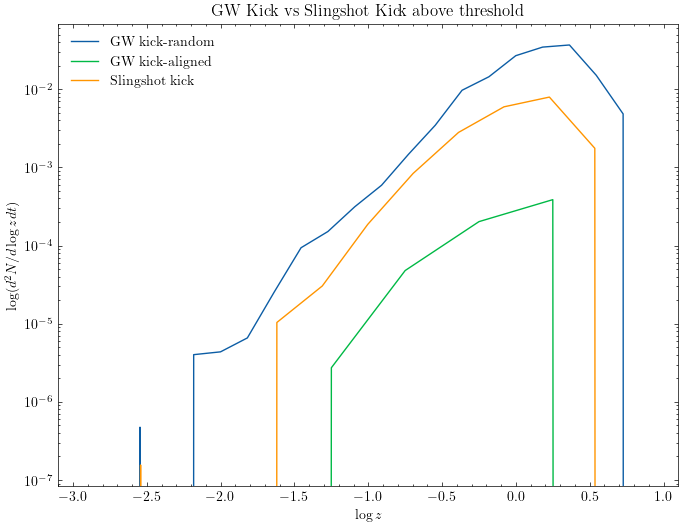

In [145]:
plt.figure(figsize=[8,6])
plt.plot(lgzbins_GW_r,dNdlogzdt_GW_r,label="GW kick-random")
plt.plot(lgzbins_GW,dNdlogzdt_GW,label="GW kick-aligned")
plt.plot(lgzbins_sling,dNdlogzdt_sling,label="Slingshot kick")
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.yscale("log")
plt.legend()
plt.title("GW Kick vs Slingshot Kick above threshold")
plt.savefig("Figures/GW_kick_aligned_vs_slingshot_rates.pdf")